# Counts vs. angle

W vs. angle for Figure 6 in the paper. 

Enable interactive plots

In [1]:
%matplotlib notebook

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import pandas as pd
import scipy.io as sio

C:\Users\pfsch\Anaconda3\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
os.getcwd()

'C:\\Users\\pfsch\\Box Sync\\Projects\\fnpc\\analysis\\compare'

In [4]:
os.chdir('..')
os.getcwd()

'C:\\Users\\pfsch\\Box Sync\\Projects\\fnpc\\analysis'

In [5]:
sys.path.append('../scripts')

In [6]:
import bicorr_sim as bicorr_sim
import bicorr_plot as bicorr_plot
import bicorr_math as bicorr_math

In [7]:
by_angle_e_meas      = pd.read_csv(r'Cf072115_to_Cf072215b/datap/by_angle_e_df.csv',index_col=0)
by_angle_e_cgmf      = pd.read_csv(r'cgmf/datap/by_angle_e_df.csv',index_col=0)
by_angle_e_freya     = pd.read_csv(r'freya/datap/by_angle_e_df.csv',index_col=0)
by_angle_e_ipol      = pd.read_csv(r'ipol/datap/by_angle_e_df.csv',index_col=0)
by_angle_e_ipol_noct = pd.read_csv(r'ipol_noct/datap/by_angle_e_df.csv',index_col=0)

Load `nps`

In [8]:
num_fission_meas = int(int(sio.loadmat('Cf072115_to_Cf072215b/datap/num_fissions.mat')['num_fissions'])*float(sio.loadmat('Cf072115_to_Cf072215b/datap/fc_efficiency.mat')['fc_efficiency']))
num_fission_cgmf = int(sio.loadmat('cgmf/datap/num_fissions.mat')['num_fissions'])
num_fission_freya= int(sio.loadmat('freya/datap/num_fissions.mat')['num_fissions'])
num_fission_ipol = int(sio.loadmat('ipol/datap/num_fissions.mat')['num_fissions'])
num_fission_ipol_noct = int(sio.loadmat('ipol_noct/datap/num_fissions.mat')['num_fissions'])
num_fissions = [num_fission_meas,
                num_fission_cgmf,
                num_fission_freya,
                num_fission_ipol,
                num_fission_ipol_noct]
print(num_fissions)

[1422133977, 192000000, 1000000000, 1000000000, 1000000000]


# Set up plot formatting

In [21]:
by_angle_es = [by_angle_e_meas, 
               by_angle_e_cgmf, 
               by_angle_e_freya, 
               by_angle_e_ipol, 
               by_angle_e_ipol_noct]
legends =['Experiment', 'CGMF',      'FREYA',      'PoliMi',    'PoliMi-No CT']
fmts   = ['x',          's',         'D',          'o',         '^']
colors = ['#5d269b',    '#dd673b',   '#80bc31',    '#3cbfe0',   '#4242f4']

to_plot = [0,1, 2, 3]

In [22]:
line_thickness = 1
ebar_width     = 3

# Normalize by integral

<IPython.core.display.Javascript object>


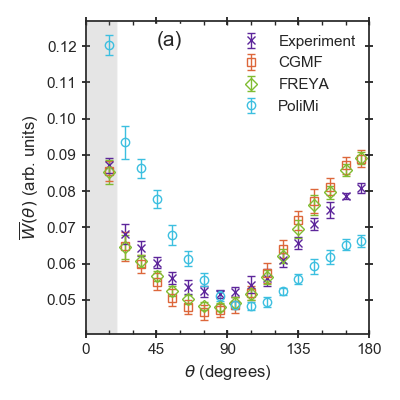

8.10284961078011e-09
7.831880213089189e-08
1.4776883861717631e-08
6.08848506385732e-08


In [23]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca()

for i in to_plot:
    by_angle_df = by_angle_es[i]
    nps = num_fissions[i]
    
    x = by_angle_df['angle_bin_centers']
    y = by_angle_df['W']
    yerr = by_angle_df['std W']
    norm_factor = np.sum(y[x>20])
    print(norm_factor)
    
    y = y/norm_factor
    yerr = yerr/norm_factor
    
    plt.errorbar(x, y, yerr=yerr,
                 fmt = fmts[i],
                 markeredgewidth=1,
                 markerfacecolor='none',
                 elinewidth = line_thickness,
                 capthick = line_thickness,
                 capsize = ebar_width,
                 c = colors[i])
leg = plt.legend([legends[i] for i in to_plot])
leg.get_frame().set_edgecolor('w')

ax.axvspan(0,20,facecolor='gray', alpha=0.2)
ax.set_xlabel(r'$\theta$ (degrees)')
ax.set_ylabel(r'$\overline{W}(\theta)$ (arb. units)')
ax.set_xlim([0,180])

# Set up ticks
ax.tick_params(axis='both',
               which='major',
               direction='inout',
               length=6,
               color='k',
               bottom=True, right=True, top=True, left=True)
ax.tick_params(axis='both',
               which='minor',
               direction='in',
               length=3,
               bottom=True, right=True, top=True, left=True)
# Major
ax.xaxis.set_major_locator(MultipleLocator(45))
#ax.yaxis.set_major_locator(MultipleLocator(0.02))
# Minor
ax.xaxis.set_minor_locator(MultipleLocator(15))
#ax.yaxis.set_minor_locator(MultipleLocator(0.005))

ax.text(45,0.12,'(a)', size=15, backgroundcolor='white')

plt.tight_layout()
    

In [19]:
os.getcwd()

'C:\\Users\\pfschus\\Box Sync\\Projects\\fnpc\\analysis'

In [24]:
bicorr_plot.save_fig_to_folder('W_normd_by_integral',r'compare\fig')

# Divide by experimental

In [25]:
def plot_calcs(by_angle_df):
    x = by_angle_df['angle_bin_centers']
    W = by_angle_df['W']
    stdW = by_angle_df['std W']
    norm_factor = np.sum(W[x>20])
    
    y = W/norm_factor
    yerr = stdW/norm_factor
    return x, y, yerr

<IPython.core.display.Javascript object>


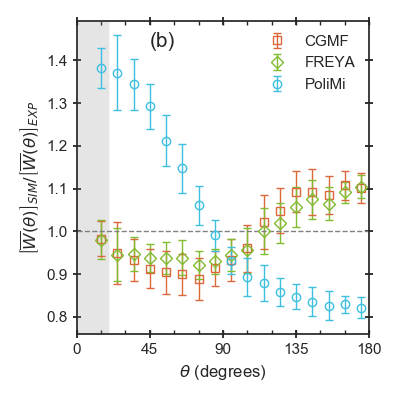

In [27]:
by_angle_df_exp = by_angle_es[0]
to_plot = [1,2,3]

fig = plt.figure(figsize=(4,4))
ax = plt.gca()

x_exp, y_exp, yerr_exp = plot_calcs(by_angle_df_exp)

for i in to_plot:
    by_angle_df = by_angle_es[i]
    x_sim, y_sim, yerr_sim = plot_calcs(by_angle_df)
    y, yerr = bicorr_math.prop_err_division(y_sim,yerr_sim,y_exp,yerr_exp)
    
    plt.errorbar(x, y, yerr=yerr,
                 fmt = fmts[i],
                 markeredgewidth=1,
                 markerfacecolor='none',
                 elinewidth = line_thickness,
                 capthick = line_thickness,
                 capsize = ebar_width,
                 c = colors[i])
leg = plt.legend([legends[i] for i in to_plot])
leg.get_frame().set_edgecolor('w')
plt.axhline(1.0,color='gray', linewidth=1,linestyle='--')

ax.axvspan(0,20,facecolor='gray', alpha=0.2)
ax.set_xlabel(r'$\theta$ (degrees)')
ax.set_ylabel(r'$\left[\overline{W}(\theta)\right]_{SIM} / \left[\overline{W}(\theta)\right]_{EXP}$')
ax.set_xlim([0,180])

# Set up ticks
ax.tick_params(axis='both',
               which='major',
               direction='inout',
               length=6,
               color='k',
               bottom=True, right=True, top=True, left=True)
ax.tick_params(axis='both',
               which='minor',
               direction='in',
               length=3,
               bottom=True, right=True, top=True, left=True)
# Major
ax.xaxis.set_major_locator(MultipleLocator(45))
#ax.yaxis.set_major_locator(MultipleLocator(0.02))
# Minor
ax.xaxis.set_minor_locator(MultipleLocator(15))
#ax.yaxis.set_minor_locator(MultipleLocator(0.005))


ax.text(45,1.43,'(b)', size=15, backgroundcolor='white')

plt.tight_layout()
bicorr_plot.save_fig_to_folder('W_normd_diff',r'compare\fig')

# Plot as-is

In [15]:
by_angle_e_meas.head()

,angle_bin_centers,angle_bin_max,angle_bin_min,len pair_is,std_angle,Sd1,Sd1_err,Sd2,Sd2_err,Cd,Cd_err,W,W_err,std W
0,15.01,20.01,10.01,40.0,0.439220,2.955429e+06,165018.977284,2.972671e+06,143275.331133,6205.425000,562.805468,7.054916e-10,1.426231e-12,1.762912e-11
1,25.01,30.01,20.01,61.0,2.611206,2.953072e+06,154381.081617,2.959469e+06,153441.969199,4836.147541,474.489055,5.526769e-10,1.023771e-12,2.284779e-11
2,35.01,40.01,30.01,40.0,1.979627,3.031907e+06,140996.406091,2.956374e+06,143205.030323,4673.100000,445.863140,5.203360e-10,1.210150e-12,1.626898e-11
3,45.01,50.01,40.01,65.0,2.335703,2.966811e+06,157069.347873,2.982086e+06,143355.187713,4318.123077,348.670508,4.878764e-10,9.252966e-13,1.229761e-11
4,55.01,60.01,50.01,72.0,3.411017,2.959667e+06,160486.282902,2.973463e+06,145293.471826,3989.805556,316.960593,4.533307e-10,8.493485e-13,1.351418e-11


In [16]:
by_angle_e_cgmf.head()

,angle_bin_centers,angle_bin_max,angle_bin_min,len pair_is,std_angle,Sd1,Sd1_err,Sd2,Sd2_err,Cd,Cd_err,W,W_err,std W
0,15.01,20.01,10.01,40.0,0.439220,399411.775000,20541.514926,395069.375000,25730.718966,1060.500000,125.945822,6.699061e-09,3.281958e-11,2.233298e-10
1,25.01,30.01,20.01,61.0,2.611206,402256.639344,18790.264487,394572.983607,22434.272063,803.655738,68.115593,5.068687e-09,2.303082e-11,3.208362e-10
2,35.01,40.01,30.01,40.0,1.979627,412384.300000,22134.568274,399908.925000,20984.112667,775.450000,85.339894,4.689538e-09,2.680188e-11,2.014330e-10
3,45.01,50.01,40.01,65.0,2.335703,404364.523077,22801.885255,395207.507692,23776.866472,689.046154,73.379190,4.305341e-09,2.047317e-11,1.858769e-10
4,55.01,60.01,50.01,72.0,3.411017,402356.263889,22887.671876,392145.791667,23938.628682,624.569444,53.981691,3.961624e-09,1.877090e-11,1.835957e-10


In [17]:
by_angle_e_ipol.head()

,angle_bin_centers,angle_bin_max,angle_bin_min,len pair_is,std_angle,Sd1,Sd1_err,Sd2,Sd2_err,Cd,Cd_err,W,W_err,std W
0,15.01,20.01,10.01,40.0,0.439220,933024.325000,57266.465537,937785.575000,53144.488095,6417.175000,680.328887,7.320480e-09,1.464061e-11,1.686357e-10
1,25.01,30.01,20.01,61.0,2.611206,933603.836066,55698.670458,934486.245902,55089.267126,4971.163934,523.509005,5.692838e-09,1.045119e-11,2.774468e-10
2,35.01,40.01,30.01,40.0,1.979627,963167.150000,54622.972676,930132.125000,54445.129665,4717.200000,525.069005,5.252619e-09,1.222123e-11,1.634644e-10
3,45.01,50.01,40.01,65.0,2.335703,939441.830769,59853.150095,941692.692308,51743.447581,4192.353846,397.838716,4.736673e-09,9.153730e-12,1.553862e-10
4,55.01,60.01,50.01,72.0,3.411017,935567.138889,58170.249938,937733.500000,52901.283383,3618.861111,293.454014,4.128945e-09,8.147667e-12,1.638523e-10


<IPython.core.display.Javascript object>


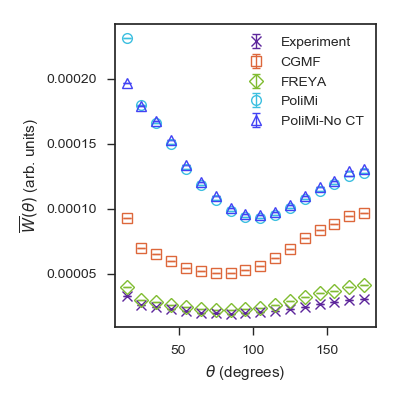

2194651200
192000000
1000000000
1000000000
1000000000


In [27]:
plt.figure(figsize=(4,4))

for i in to_plot:
    by_angle_df = by_angle_es[i]
    nps = num_fissions[i]
    print(nps)
    
    x = by_angle_df['angle_bin_centers']
    # y = by_angle_df['W']*nps
    y = by_angle_df['W']*np.sqrt(nps)
    yerr = 0
    
    plt.errorbar(x, y, yerr=yerr,
                 fmt = fmts[i],
                 markeredgewidth=1,
                 markerfacecolor='none',
                 elinewidth = line_thickness,
                 capthick = line_thickness,
                 capsize = ebar_width,
                 c = colors[i])
    plt.legend([legends[i] for i in to_plot])
    plt.xlabel(r'$\theta$ (degrees)')
    plt.ylabel(r'$\overline{W}(\theta)$ (arb. units)')
    
    plt.tight_layout()
    

In [13]:
by_angle_df.head()

,angle_bin_centers,angle_bin_max,angle_bin_min,len pair_is,std_angle,Sd1,Sd1_err,Sd2,Sd2_err,Cd,Cd_err,W,W_err,std W
0,15.01,20.01,10.01,40.0,0.439220,912423.850000,56167.932978,917238.800000,52067.113171,5216.875000,604.209284,6.214764e-09,1.377003e-11,1.272852e-10
1,25.01,30.01,20.01,61.0,2.611206,912520.508197,54641.403681,913321.918033,53823.636131,4721.803279,498.226060,5.656014e-09,1.065327e-11,1.595959e-10
2,35.01,40.01,30.01,40.0,1.979627,942056.900000,53776.586986,909593.900000,52883.678154,4546.725000,495.436575,5.293874e-09,1.254594e-11,1.440224e-10
3,45.01,50.01,40.01,65.0,2.335703,918467.569231,58816.482789,920924.000000,50301.088798,4097.692308,389.537356,4.841977e-09,9.464519e-12,1.526777e-10
4,55.01,60.01,50.01,72.0,3.411017,914850.430556,57100.673431,917123.916667,51510.427396,3545.416667,291.361495,4.229359e-09,8.431790e-12,1.689208e-10


<IPython.core.display.Javascript object>


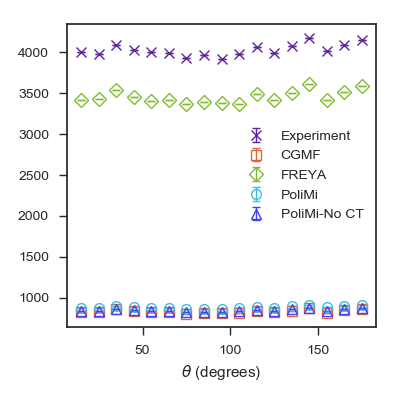

In [39]:
plt.figure(figsize=(4,4))

for i in to_plot:
    by_angle_df = by_angle_es[i]
    nps = num_fissions[i]
    
    x = by_angle_df['angle_bin_centers']
    y = np.multiply(by_angle_df['Sd1'], by_angle_df['Sd2'])/nps
    yerr = 0
    
    plt.errorbar(x, y, yerr=yerr,
                 fmt = fmts[i],
                 markeredgewidth=1,
                 markerfacecolor='none',
                 elinewidth = line_thickness,
                 capthick = line_thickness,
                 capsize = ebar_width,
                 c = colors[i])
plt.legend([legends[i] for i in to_plot])
plt.xlabel(r'$\theta$ (degrees)')
# plt.ylabel(r'$\overline{W}(\theta)$ (arb. units)')

plt.tight_layout()
    